# Film crew waffle charts

**Goal.** We use dataset ‘tmdb_5000_credits’ that has information for hundreds movies from tmdb.<br>
Our goal is to analyze crew of the first 50 films in the dataset.<br>
We will see, how many crew members each speciality has, take the three most popular ones and build<br>
several waffle charts based on them.

# Step 1. Preparing dataset

Load libraries.<br>
As cast and crew members features has json type we also need json library.

In [95]:
import numpy as np
import pandas as pd
import json as js

Also we import necessary matplotlib modules, changing plot style to **ggplot.**

In [96]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

Let’s download the main dataset.

In [97]:
data = pd.read_csv('tmdb_5000_credits.csv')

We can check the first five instances and the data feature types.

In [98]:
data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


We see that the feature we are interested in (**crew**) has **object** type.<br>
Let’s make a work sub-dataset, containing the first 50 movies and their crew feature.<br>
We also create a dictionary **all_jobs** with position counter throughout the sub-data.

In [100]:
work_data = data.head(50).loc[:,'crew']
all_jobs = {}

Let’s count all the positions parsing feature data.

In [101]:
for jobs in work_data:
    df = js.loads(jobs)
    result = [person[key] for key, value in person.items() if key=='job' for person in df]
    for position in result:
        all_jobs[position] = all_jobs.get(position, 0) + 1

Then we sort the results by the amoung of people (in a reverse way), save the first three result in a new variable, create dataframe from it, change the columns names, and make new index rows right from the positions.

In [102]:
jobs_sum = pd.DataFrame(sorted(all_jobs.items(), key=lambda x: (-x[1], x[0]))[:3])
jobs_sum.columns = ['position', 'total']
jobs_sum.index = jobs_sum.position
jobs_sum.drop("position", axis=1, inplace=True)

Now we can check the result.

In [103]:
jobs_sum

,total
position,
Executive Producer,155
Art Direction,151
Producer,140


The sub-dataframe is ready for visualization.

# Step 2. Generating waffle-charts

First, we create width and height variables – parameters of the future charts.

In [104]:
width = 40
height = 10

Then we create an empty matrix for the chart and fill it.

In [105]:
waffle_chart = np.zeros((height, width), dtype = np.uint)
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(jobs_sum['total'][0:category_index]):
            category_index += 1
        waffle_chart[row, col] = category_index

Let’s check the result.

In [106]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Now can show the waffle chart as a new figure.

<Figure size 432x288 with 0 Axes>

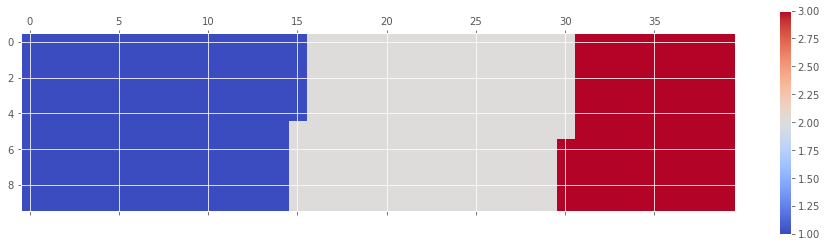

In [107]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

We see, that Executive Producer and Art Direction have almost the same areas (blue and grey),<br>while the Producer has the smallest area (the red one).

To make our chart more clear, we can use detailed ticks. The amount of ticks for the feature<br>
will be equal to its value in **total** column.<br>
We will use the same steps adding only setting of axes and minor ticks.

<Figure size 432x288 with 0 Axes>

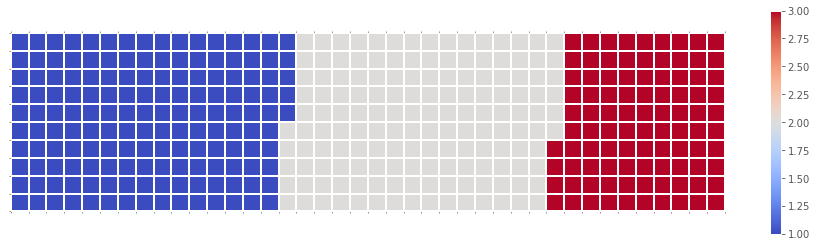

In [108]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

Now the feature areas are more detailed.<br>
We can improve this even more by adding legend, which will show the correspondence between crew role and the color.<br>
In this case we put necessary comments to the script below.

<Figure size 432x288 with 0 Axes>

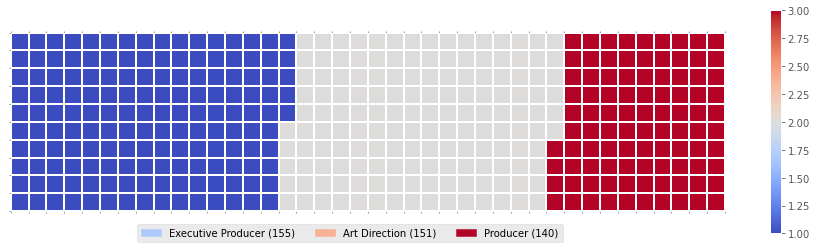

In [109]:
# Base for the new chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Set axes and minor ticks
ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Creating legend
values_cumsum = np.cumsum(jobs_sum['total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, category in enumerate(jobs_sum.index.values):
    label_str = category + ' (' + str(jobs_sum['total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(jobs_sum.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))    

# Showing the chart
plt.show()

**Result.** We have found three most popular roles for the first 50 movies in the dataset – Executive Producer, Art Direction and Producer. We also used waffle charts for visualization of their corespond values: basic, with detailed ticks and with legend.